In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection  import GridSearchCV
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [2]:
def notEmpty(s):
    return s != ''

In [3]:
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
## 拦截异常
warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [5]:
names = ['CRIM','ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
path = "./boston_housing.data"
## 由于数据文件格式不统一，所以读取的时候，先按照一行一个字段属性读取数据，然后再按照每行数据进行处理
fd = pd.read_csv(path, header=None)
data = np.empty((len(fd), 14))
for i, d in enumerate(fd.values):
    d = map(float, filter(notEmpty, d[0].split(' ')))
    data[i] = list(d)

x, y = np.split(data, (13,), axis=1)
y = y.ravel()

print ("样本数据量:%d, 特征个数：%d" % x.shape)
print ("target样本数据量:%d" % y.shape[0])

样本数据量:506, 特征个数：13
target样本数据量:506


In [6]:
#数据的分割，
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, train_size=0.8, random_state=14)
x_train, x_test, y_train, y_test = x_train1, x_test1, y_train1, y_test1
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (x_train.shape[0], x_test.shape[0]))

训练数据集样本数目：404, 测试数据集样本数目：102


E:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [14]:
#构建模型（回归）
#criterion决策树选择标准   max_depth最大树深
model=DecisionTreeRegressor(criterion='mse',max_depth=7)
#模型训练
model.fit(x_train,y_train)
#模型预测
y_test_hat=model.predict(x_test)


In [15]:
#评估模型
score=model.score(x_test,y_test)
print('score:',score)

score: 0.8110725302094294


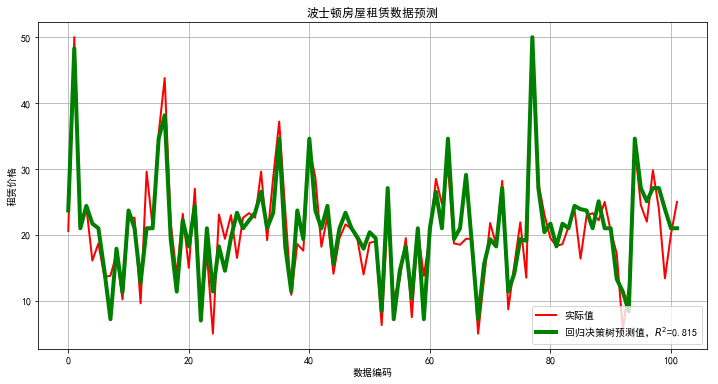

In [13]:
plt.figure(figsize=(12,6), facecolor='w')
ln_x_test = range(len(x_test))
plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'实际值')
plt.plot(ln_x_test, y_test_hat, 'g-', lw=4, label=u'回归决策树预测值，$R^2$=%.3f' % score)
plt.xlabel(u'数据编码')
plt.ylabel(u'租赁价格')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.title(u'波士顿房屋租赁数据预测')
plt.show()